# The system

In [1]:
%load_ext tikzmagic

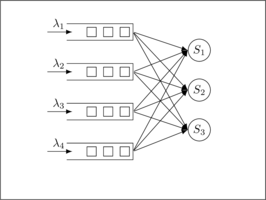

In [2]:
%%tikz -s 600,200 -l shapes -f png 
    \tikzset{thick,
        every node/.style={transform shape},
        server/.style={draw, circle, inner sep=2pt},
        every edge/.style = {draw, -latex}
    }

    \newcommand{\queue}[6]{
        \def\basicwidth{0.5}
        \def\nnodes{#4}
        \begin{scope}[shift = {(#1,#2)}, scale=#3]
            \draw (0,0) -- ++(#4*\basicwidth+\basicwidth,0) -- node[inner sep=0](#5){} ++(0,\basicwidth) -- ++(-#4*\basicwidth-\basicwidth,0);
            \foreach \x in {1,...,#4}{	\node[draw, minimum size=\basicwidth*16] at (\basicwidth/2 + \x*\basicwidth,  \basicwidth/2) {};}
            \draw[latex-](\basicwidth/3, \basicwidth/2) -- node[above, xshift=-1pt, yshift=-1pt]{#6} ++ (-\basicwidth*1.5, 0);
        \end{scope}
    }

    \draw [fill=white] (-2,0.0) rectangle (6,-6);
                            
    \foreach \x in {1, ..., 4}{\queue{0}{-1.2*\x}{1}{3}{q\x}{$\lambda_\x$}}
    \foreach \x in {1, ..., 3}{\node[server] (s\x) at (4, -0.3-1.2*\x) {$S_\x$};}

    \foreach \x in {1, ..., 4}{
        \foreach \y in {1, ..., 3}{
        \draw (q\x) edge (s\y.west);}}


# Main ideas

## System Equilibrium Equations
Let us denote as $P(\bar{w}, \bar{s})$ the probability to have $\bar{w}$ items waiting and $\bar{s}$ the items in service.

The equilibrium equations are as follows:

For $n>k$
$$\left (\sum_{i=1}^N \lambda_i +  \sum_{i=1}^N s_i\mu_i \right) P(\bar{w}, \bar{s}) = \sum_{i=1}^N \lambda_i P(\bar{w}-e_i, \bar{s}) + \sum_{i=1}^N \sum_{j=1}^N \frac{w_i+1}{|\bar{w}|+1} (s_j + 1 - e_{ij})\mu_j P(\bar{w}+e_i, \bar{s}-e_i+e_j)$$

For $n=k$
$$\left (\sum_{i=1}^N \lambda_i +  \sum_{i=1}^N s_i\mu_i \right) P(\bar{0}, \bar{s}) = \sum_{i=1}^N \lambda_i P(\bar{0}, \bar{s}-e_i) + \sum_{i=1}^N \sum_{j=1}^N (s_j + 1 - e_{ij})\mu_j P(e_i, \bar{s}-e_i+e_j)$$

For $0<n<k$
$$\left (\sum_{i=1}^N \lambda_i +  \sum_{i=1}^N s_i\mu_i \right) P(\bar{0}, \bar{s}) = \sum_{i=1}^N \lambda_i P(\bar{0}, \bar{s}-e_i) + \sum_{j=1}^N (s_j + 1)\mu_j P(0, \bar{s}+e_j)$$

For $0=n$
$$\sum_{i=1}^N \lambda_i P(\bar{0}, \bar{0}) = \sum_{j=1}^N \mu_j P(0, e_j)$$

## Product-Form Solution
The steady state probabilities $P(\bar{w}, \bar{s})$ can be expressed as:
$$P(\bar{w}, \bar{s}) =  |\bar{w}|!  \prod_{i=1}^N \frac{\alpha_i^{w_i}}{w_i!} P_n(\bar{s})$$

Denote further the vector that contains all  components $P_n(\bar{s})$ as $\mathbf{P}_n$ 


The equilibrium equations can be rewritten as:

For $n>k$
$$\mathbf{A}_0 \mathbf{P}_n = \mathbf{\Lambda} \mathbf{P}_{n-1} + \mathbf{A}_1 \mathbf{P}_{n+1}$$
where $\mathbf{A}_0$ is a diagonal matrix with $\sum_{i=1}^N \lambda_i +  \sum_{i=1}^N s_i\mu_i$ on each diagonal cell corresponding to $\bar{s}$. <br>In $\mathbf{A}_1$ each element corrsponding to $(\bar{s}, \bar{s}-e_i+e_j)$ will be:
$\sum_{i=1}^N \sum_{j=1}^N \alpha_i (s_j + 1 - e_{ij})\mu_j$ 

For $n=k$
$$\mathbf{A}_0 \mathbf{P}_{n} = \sum_{i=1}^N \lambda_i P(\bar{0}, \bar{s}-e_i) + \mathbf{A}_1 \mathbf{P}_{n+1}$$

For $0<n<k$
$$\left (\sum_{i=1}^N \lambda_i +  \sum_{i=1}^N s_i\mu_i \right) P(\bar{0}, \bar{s}) = \sum_{i=1}^N \lambda_i P(\bar{0}, \bar{s}-e_i) + \sum_{j=1}^N (s_j + 1)\mu_j P(0, \bar{s}+e_j)$$

For $0=n$
$$\sum_{i=1}^N \lambda_i P(\bar{0}, \bar{0}) = \sum_{j=1}^N \mu_j P(0, e_j)$$

## State space dimensions
$$dim(N, k) = \frac{(N + k − 1)!}{k!(N − 1)!} $$

In [3]:
N = 10
k = 8
from scipy.special import comb
comb(N + k - 1, k)

24310.0

## Computing Steady-State probabilities
### Steady-State probabilities for $n>k$
The equation $\mathbf{A}_0 \mathbf{P}_n = \mathbf{\Lambda} \mathbf{P}_{n-1} + \mathbf{A}_1 \mathbf{P}_{n+1}$ can be solved using Martix-Geometric approach and the probability vectors $\mathbf{P}_n$ can be expressed as the following geometric series:
$$\mathbf{P}_n = \mathbf{Z} \mathbf{P}_{n-1} = \mathbf{Z}^{n-k} \mathbf{P}_{k}$$

The matrix $\mathbf{Z}$ is the solution of the following quadratic matxix equation:
$$\mathbf{A}_0 \mathbf{Z} = \mathbf{\Lambda}  + \mathbf{A}_1 \mathbf{Z}^2$$
and can be found using eigenvalue/vector formulations or using the follwoing iterative procedure.

Define 
    $$\mathbf{Z}_l = \mathbf{A}_0^{-1} (\mathbf{\Lambda} + \mathbf{A}_1 \mathbf{Z}_{l-1}^2)$$
Then if we start with $\mathbf{Z_0}=\mathbf{0}$, the matrix $\mathbf{Z}$ will be:
$$\mathbf{Z} = \lim_{l\to \infty} \mathbf{Z}_{l}$$

### Steady-State probabilities for $n\le k$
The probability vectors $\mathbf{P}_n$ for $n\le k$ will be computed as:
$$ \mathbf{P}_n = \mathbf{Q}_{n-1} \mathbf{P}_{n-1} = \mathbf{Q}_{n-1} \cdots \mathbf{Q}_{0} \mathbf{P}_{0} $$
The matrices $\mathbf{Q}_{n}$ are such that the following equations are satisified:
$$\mathbf{A}_{0,n} \mathbf{Q}_{n} = \mathbf{\Lambda}_n  + \mathbf{A}_{1,n} \mathbf{Q}_{n+1}\mathbf{Q}_{n}$$
where:
 - $\mathbf{\Lambda}_n$ is and $dim(n) \times dim(n-1)$ matrix corresponding to the terms with $ \sum_{i=1}^N \lambda_i P(\bar{0}, \bar{s}-e_i)$
 - $\mathbf{A}_{0,n}$ is and $dim(n) \times dim(n)$ matrix corresponding to the terms with $\left (\sum_{i=1}^N \lambda_i +  \sum_{i=1}^N s_i\mu_i \right) P(\bar{0}, \bar{s}) $
 - $\mathbf{\Lambda}_n$ is and $dim(n) \times dim(n+1)$ matrix corresponding to the terms with $ \sum_{j=1}^N (s_j + 1)\mu_j P(0, \bar{s}+e_j)$

The matrix $\mathbf{Q}_{n}$ will be computed iteratively as:
- $\mathbf{Q}_{k} = \mathbf{Z}$
- $\mathbf{Q}_n = (\mathbf{A}_{0,n} - \mathbf{A}_{1,n} \mathbf{Q}_{n+1})^{-1} \mathbf{\Lambda}_n$, for $n<k$


After that we can compute $\mathbf{P}_0$ using normalization equation:
$$ \mathbf{P}_0 = \left (1 + \mathbf{E}_1  \mathbf{Q}_0 + \mathbf{E}_2 \mathbf{Q}_1 \mathbf{Q}_0 + \cdots + \mathbf{E}_k (\mathbf{I} - \mathbf{Z} )^{-1} \mathbf{Q}_{k-1} \cdots \mathbf{Q}_0 \right )^{-1}$$ 

the the system state propoabilities as:
- $\mathbf{P}_n = \mathbf{Q}_{n-1} \mathbf{P}_{n-1}$, for $n\le k$
- $\mathbf{P}_n = \mathbf{Z} \mathbf{P}_{n-1} $, for  $n > k$



## Computing $E[N_i]$ and $Var[N_i]$

$E[N_i]= E[Q_i] + Q[S_i] = E[Q_i] + {\lambda_i \over \mu_i}$

$E[Q_i]= \alpha_i \mathbf{1}^T (\mathbf{I} - \mathbf{Z} )^{-2} \mathbf{Z} \mathbf{P}_{k}$

$Var[N_i]= E[Q^2_i] + E[Q_i\cdot S_i] + E[S_i^2] - E[N_i]^2$

$Var[Q_i] = E[Q_i^2] - E[Q_i]^2$

$E[Q_i^2] = E[Q_i(Q_i-1)] + E[Q_i]$

$E[Q_i(Q_i-1)] = 2 \alpha^2_i \mathbf{1}^T (\mathbf{I} - \mathbf{Z} )^{-3} \mathbf{Z}^2 \mathbf{P}_{k}$

$E[Q_i S_i] = \alpha_i \mathbf{\chi}_{k,S} (\mathbf{I} - \mathbf{Z} )^{-2} \mathbf{Z} \mathbf{P}_{k}$ - where $\mathbf{\chi_S}$ are the vectors containing number of items of each type in the service

$E[S^2_i] = \sum_{n=1}^{k-1} \mathbf{\chi}^2_{n,S} \mathbf{P}_{n} + \mathbf{\chi}^2_{k,S} (\mathbf{I} - \mathbf{Z} ) \mathbf{P}_{k} $ 


$Var[N_2] = E[Q_i(Q_i-1)] + E[Q_i] + 2E[Q_i S_i] + E[S^2_i]$



------------------

# Codes

In [4]:
# initialize libraries
import numpy as np
from collections import defaultdict
np.set_printoptions(linewidth=200)

In [5]:
# Define the generator that will generate all possible assignments of classes to servers, without permutations
def generateVectorsFixedSum(m,n):
    # generator for all combinations of $w$ for given number of servers and classes
    if m==1:
        yield [n]
    else:
        for i in range(n+1):
            for vect in generateVectorsFixedSum(m-1,n-i):
                yield [i]+vect

In [6]:
# Example
mClasses = 3
nServers = 3

# to produce the combinations
# the generators should be called in a loop
# the loop will stop when all possible combinations are generated
# the vectors contain numbers of customers of each class in the system
for i, vec in enumerate(generateVectorsFixedSum(mClasses, nServers)):
    print(i, vec)
    
# 'enumerate' produces two values, the generated vector and its number in the whole sequence.
# 'enumerate' will be used later to produce mapping between the states of the system and matrix elements

0 [0, 0, 3]
1 [0, 1, 2]
2 [0, 2, 1]
3 [0, 3, 0]
4 [1, 0, 2]
5 [1, 1, 1]
6 [1, 2, 0]
7 [2, 0, 1]
8 [2, 1, 0]
9 [3, 0, 0]


In [7]:
# create some data
mClasses = 7
nServers = 8
lamda = np.array([3.0, 4.0, 5.0]) #np.linspace(1,2,mClasses)
mu = 5*np.ones(mClasses) #np.linspace(2,1,mClasses)
lamda = np.linspace(1,3,mClasses)
mu = np.linspace(3,1,mClasses)
rho = 0.9
mu_correction = sum(lamda/mu)/nServers/rho
mu *= mu_correction
print(lamda)
print(mu)
print(sum(lamda/mu), sum(lamda/mu)/nServers)
assert sum(lamda/mu)<nServers # ensure stability

[1.         1.33333333 1.66666667 2.         2.33333333 2.66666667 3.        ]
[3.7281746  3.31393298 2.89969136 2.48544974 2.07120811 1.65696649 1.24272487]
7.200000000000001 0.9000000000000001


In [8]:
# lamda = np.array([  2.23738889e-01,   4.94087095e-02,   9.83533638e-03,   2.32382124e-01,   3.31158691e-05,   7.81429552e-02,   2.04179403e-01,   1.43352018e-01,   4.02415285e-02,   1.86859200e-02])
# mu =    np.array([  1.76753604e+00,   4.69646045e-02,   2.32412359e+00,   3.29198749e-01,   1.99622149e-05,   5.00131046e-01,   4.21953234e-01,   7.21777996e-02,   5.78270470e-02,   1.65334582e-02])
# mClasses = len(lamda)
# nServers = 10

In [9]:
# lamda = np.array([  2.23738889e-01,   4.94087095e-02,   9.83533638e-03,   2.32382124e-01,   3.31158691e-05,   7.81429552e-02,   2.04179403e-01,   1.43352018e-01,   4.02415285e-02,   1.86859200e-02])
# mu =    np.array([  1.76753604e+00,   4.69646045e-02,   2.32412359e+00,   3.29198749e-01,   1.99622149e-05,   5.00131046e-01,   4.21953234e-01,   7.21777996e-02,   5.78270470e-02,   1.65334582e-02])

# print lamda/mu
# print 1/mu[4]

In [10]:
# initialize \Lamda and \alpha
lambdaTot = sum(lamda)
alpha = lamda/lambdaTot
muTot = lambdaTot/nServers/rho
delta = muTot/mu-1

In [11]:
# create mapping between the combination vectors and matrix columns/rows
idx_map = defaultdict(None, [ (tuple(vect), i) for i, vect in enumerate(generateVectorsFixedSum(mClasses, nServers)) ])
len(idx_map)

3003

In [12]:
# %%timeit
# generate matrices A_0 and A_1
q_max = len(idx_map)
# A0_inv = np.zeros((q_max,q_max))  #corresponds to terms with i items in queue
# A02_inv = np.zeros((q_max,q_max))  #corresponds to terms with i items in queue
A0 = np.zeros((q_max,q_max))  #corresponds to terms with i items in queue
A1 = np.zeros((q_max,q_max))  #corresponds to terms with i+1 items in queue
# for i, idx in i_map.items():
for idx, i in idx_map.items():    
    #diagonal term
#     print idx, mu, idx.shape, mu.shape, 
#     print np.sum(idx*mu), lambdaTot
    A0[i,i] = (1 + np.sum(idx*mu)/lambdaTot)
#     A0_inv[i,i] = 1/(1 + np.sum(idx*mu)/lambdaTot)
    # A02_inv[i,i] = A0_inv[i,i]**2


    #term corresponding to end of service for item j1, start of service for j2
    for j1 in range(mClasses):
        for j2 in range(mClasses):
            idx_temp = list(idx)
            idx_temp[j1] += 1; idx_temp[j2] -= 1
            i1 = idx_map.get(tuple(idx_temp))  #convert 'list' back to tuple to use it as a key
            if i1 != None: A1[i,i1] += alpha[j2]/lambdaTot*idx_temp[j1]*mu[j1]
q_max

3003

In [13]:
def computeZ(A0, A1, dtype = np.float32, eps=1.06e-6): #delta_func = np.mean, 
    # compute matrix Z iteratively

    delta=np.inf
    Z_prev = np.zeros(A1.shape, dtype=dtype).astype(dtype)
    A0_inv = np.linalg.inv(A0).astype(dtype)
    A01 = A0_inv.astype(dtype) @ A1.astype(dtype) #.astype(dtype)
    while delta>eps:
        Z = A0_inv + A01 @ Z_prev @ Z_prev  #invA0*(I+A1*Z*Z)
        delta = np.max(np.abs(Z-Z_prev))
        Z_prev=Z
        
    invIminZ = np.linalg.inv(np.eye(A0.shape[0], dtype=dtype) - Z).astype(dtype)
    invIminZZ = invIminZ@Z
    invIminZ2Z = invIminZ@invIminZZ

    return Z, invIminZ, invIminZZ, invIminZ2Z

In [14]:
def computeZeigs(A0, A1, dtype = np.float32): #delta_func = np.mean, 
    H = np.vstack((np.hstack((A0, -A1)),np.hstack((np.eye(q_max), np.zeros((q_max,q_max)))))).astype(dtype)
    
    vals, vecs = np.linalg.eig(H) #.astype(dtype)

    idx = np.real(vals).argsort()[::-1] 
    vals = np.real(vals).astype(dtype)[idx[:q_max]]
    vecs = np.real(vecs).astype(dtype)[:q_max,idx[:q_max]]
    inv_vecs = np.linalg.inv(vecs)

    Z = vecs@np.diag(1/vals)@inv_vecs
                        
    invIminZ = vecs@np.diag(vals/(vals-1))@inv_vecs
    invIminZZ = invIminZ@Z
    invIminZ2Z = invIminZ@invIminZZ
    
    return vals, vecs, Z, invIminZ, invIminZZ, invIminZ2Z

In [15]:
# two diffrent ways to compute Z matrix (iteratively and using eigen values)
Z, invIminZ, invIminZZ, invIminZ2Z = computeZ(A0, A1, dtype = np.float64, eps=1.06e-10)
vals, vecs, Z2, _, _, _ = computeZeigs(A0, A1, dtype = np.float64)

np.abs(Z2 - Z).max()

2.09598933305008e-09

In [16]:
# %timeit computeZ(A0, A1)
# %timeit computeZeigs(A0, A1)

In [17]:
# generate Q matrices, it will be stored in a list
Q = []
idxMat = [] # matrix with server occupancy for each system state, will be used in computing the system parameters
Q.insert(0, Z[:])
idxMat.insert(0, np.array([x for x in idx_map.keys()]))

In [18]:
# i_map_full = []
# i_map_full.append(i_map)


idx_map_nplus = idx_map 
q_max_nplus   = len(idx_map_nplus)

idx_map_n = idx_map_nplus
q_max_n   = q_max_nplus

A1_n = A1[:]

for n in range(nServers,0,-1):
    idx_map_nminus = defaultdict(None, [(tuple(vect), i) for i, vect in enumerate(generateVectorsFixedSum(mClasses, n-1)) ])
    q_max_nminus   = len(idx_map_nminus)
    

    L_n = np.zeros((q_max_n,q_max_nminus))  #corresponds to terms with i items in queue
    A0_n = np.zeros((q_max_n,q_max_n))  #corresponds to terms with i items in queue
    for idx, i in idx_map_n.items():

        #diagonal term
        A0_n[i,i] += 1 + np.sum(idx*mu)/lambdaTot

        #term corresponding to arrival of item item j1
        for j2 in range(mClasses):
            idx_tmp = list(idx)
            idx_tmp[j2] -= 1
            i2 = idx_map_nminus.get(tuple(idx_tmp))
            if i2 != None: L_n[i,i2] += alpha[j2]
                

    # Q_n = (A_0 - A_1*Q_{n+1})^{-1}*L_n
    Q.insert(0, np.dot(np.linalg.inv(A0_n-np.dot(A1_n, Q[0])), L_n)) 

    idx_map_nplus = idx_map_n
    q_max_nplus   = q_max_n

    idx_map_n = idx_map_nminus
    q_max_n   = q_max_nminus
    idxMat.insert(0, np.array([x for x in idx_map_n.keys()]))    


    A1_n = np.zeros((q_max_n,q_max_nplus))  #corresponds to terms with i+1 items in queue
    for idx, i in idx_map_n.items():
        #term corresponding to end of service for item j1
        for j1 in range(mClasses):
            idx_tmp = list(idx)
            idx_tmp[j1] += 1
            i1 = idx_map_nplus.get(tuple(idx_tmp))
            if i1 != None: A1_n[i,i1] += idx_tmp[j1]*mu[j1]/lambdaTot
                

In [19]:
# compute the P_n for n<k and normalize it such that sum(P_n) = 1
P = []
P.append([1.0])

sm = 1.0
for n in range(nServers):
    P.append(np.dot(Q[n],P[-1]))
    sm += sum(P[-1])

# inv1minZ = np.linalg.inv(np.eye(len(P[-1])) - Z)
# inv1minZZ = inv1minZ@Z
# inv1minZ2Z = inv1minZ@inv1minZZ
sm += sum(invIminZZ@P[-1])

for p in P: p[:] /= sm  #normalization

In [20]:
# compute totals needed for the E[Q_i] - marginal distributions
EQTotal = sum(invIminZ2Z@P[-1])
EQQmin1Total = 2*sum(invIminZ@invIminZ2Z@Z@P[-1])
EQ2Total = EQQmin1Total + EQTotal

# compute 1st and 2nd marginal moments of the numbers in the queue E[Q_i] and E[Q_i^2]
EQ = alpha*EQTotal
EQQmin1 = alpha*alpha*EQQmin1Total
EQ2 = EQQmin1 + EQ

In [21]:
# compute 1st and 2nd marginal moments of the numbers in the system E[N_i] and E[N_i^2]
ENTotal = EQTotal + sum(lamda/mu)
EN = EQ + lamda/mu

# TODO compute the E[N_i^2]
ES2 = np.zeros(mClasses)
for (p, idx) in zip(P[:-1], idxMat[:-1]):
    ES2 += np.dot(p, idx**2)
ES2 += invIminZ@P[-1]@idxMat[-1]**2

ESq = alpha*(invIminZ2Z@P[-1]@idxMat[-1])

EN2 = EQ2 + 2*ESq + ES2


In [22]:
# compute marginal variances of the numbers in the queue Var[Q_i] and in the system Var[N_i] 
VarQTotal = EQ2Total - EQTotal**2
VarQ = EQ2 - EQ**2

VarN = EN2 - EN**2



In [23]:
print(EN)
print(VarN)

[0.7719446  1.07396409 1.41430184 1.81211698 2.30189592 2.95261153 3.92520048]
[1.25987003 1.94475656 2.78249166 3.79886127 5.04275367 6.61870361 8.79377484]
